# Bert 모델
- aws python3에서 진행
- conda activate python3


- 만약 python3가 아닌 다른 커널로 들어갔다면, 아래의 2가지 방법으로 재설정하도록 한다. 
    1.  conda deactivate <해당 커널>
    2. 1) ps -e : jupyter notebook 채널 번호 확인  
       2) kill <jupyter notebook 채널 번호>  
       3) conda activate python3 실행

## BERT의 특징
- 전이학습 모델 
    - 구글의 Devlin(2018)이 제안한 BERT는 사전 학습된 대용량의 레이블링 되지 않는(unlabeled) 데이터를 이용하여 언어 모델(Language Model)을 학습하고 이를 토대로 특정 작업( 문서 분류, 질의응답, 번역 등)을 위한 신경망을 추가하는 전이 학습 방법임

- 사전 학습 모델
- 대용량의 데이터를 직접 학습시키기 위해서는 매우 많은 자원과 시간이 필요하지만, BERT 모델은 기본적으로 대량의 단어 임베딩 등에 대해 사전 학습이 되어 있는 모델을 제공하기 때문에 상대적으로 적은 자원만으로도 충분히 자연어 처리의 여러 일을 수행할 수 있다.

- 이전에는 단어 임베딩을 위해 Word2Vec, Glove, Fasttext 방식을 사용했지만, BERT가 자연어 처리 분야의 11개 실험에서 가장 좋은 성능을 차지하면서 많이 사용되고 있음
    - 즉 단어 임베딩에 뛰어난 성능을 보이고 있다
    
    
- 특징과 모델이라는 두 단어는 상당히 거리가 있는 단어라고 처리 후 다르게 분류
- **임베딩된 어휘사전을 잘 구비하는게 가장 중요!**

## Bert 구조

###  BERT의 input(입력벡터) representation
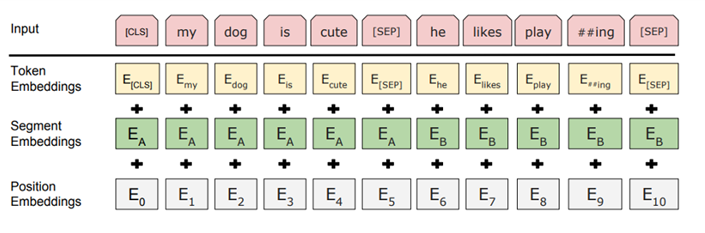

1) Token Embeddings
- Token Embeddings는 Word piece 임베딩 방식을 사용함
    - Word Piece 임베딩 : 자주 등장하면서 가장 긴 길이의 sub-word을 하나의 단위로 만드는 것
    - 즉, 자주 등장하는 단어(sub-word)는 그 자체가 단위가 되고, 자주 등장하지 않는 단어(rare word)는 더 작은 sub-word로 쪼개어진다
    - 이는 이전에 자주 등장하지 않은 단어를 전부 Out-of-vocabulary(OOV)로 처리하여 모델링의 성능을 저하했던 문제를 해결한다고 알려짐
        - 즉, 자주 등장하는 단어에만 포커스가 주어져서 자주 등장하지 않는 단어를 무시해 의미 전달이 많이 저하되었던 문제를 해결함
- 입력받은 모든 문장의 시작으로 [CLS] 토큰(special classification token)이 주어지며 이 [CLS] 토큰은 모델의 전체 계층을 다 거친 후 토큰 시퀀스의 결합된 의미를 가지게 됨
    - 여기에 간단한 classifier을 붙이면 단일 문장, 또는 연속된 문장을 분류할 수 있고 만약 분류 작업이 아니라면 이 토큰(CLS)은 무시
- 또한 문장의 구분을 위해 문장의 끝에 [SEP] 토큰을 사용함

2) Segment Embeddings
- Segment Embeddings는 토큰으로 나누어진 단어들을 다시 하나의 문장으로 만들고
    - 첫 번째 [SEP] 토큰까지는 0으로 그 이후 [SEP] 토큰까지는 1 값으로 마스크를 만들어 각 문장들을 구분

 
3) Position Embeddings
- Position Embeddings는 토큰의 순서를 인코딩한다
    - 순서가 필요한 이유는 BERT는 transformer의 encoder를 사용하는데 Transformer는 Self-Attention 모델을 사용
        - Self-Attention은 입력의 위치에 대해 고려하지 못하므로 입력 토큰의 위치 정보를 주어야 문장의 순서를 반영할 수 있음
        
        
- 성능이 발전하는 이유
    - 굉장히 잘게 쪼갠 후 다시 조합하기 때문


- LSTM은 이전 단어를 기억하고 있다가 문맥 파악
    - LSTM보다 훨씬 더 긴 저장소를 가지고 있음
    - 위치에 대한 정보까지 모두 학습한 후, 추후 합쳐서 파악

## 위의 각 임베딩들의 토큰 별로 모두 더하여 BERT의 입력 벡터로 사용

### BERT의 Pre-training과  Fine-Tuning
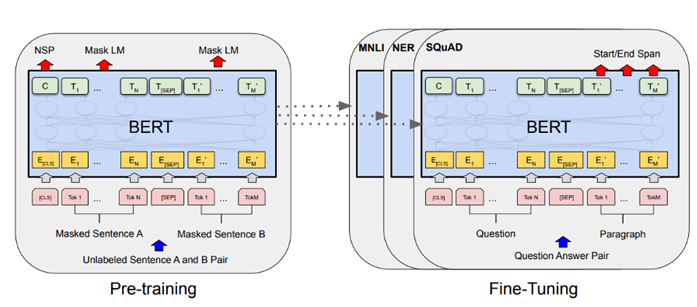

- BERT를 이용한 자연어 처리는2단계로 진행
    1. 거대 Encoder가 입력 문장들을 임베딩하여 언어를 모델링하는 Pre-training 과정
    2. 이를 fine-tuning하여 여러 자연어 처리 Task를 수행하는 과정

## Bert 사용 순서
1. bert tokenizer 설치
2. 필요 패키지 install
3. Data 준비
- 학습 data와 학습 label을 따로 분리해서 준비해야 함    
4. bert tokenizer 이용 bert dataset 생성
    1. 위 데이터를 다시 pytorch에서 사용하는 data 형태로 변경
5. pretrain된 bert 모델 이용해서 모델 생성
6. 모델 컴파일
7. 모델 학습

#### 1. bert tokenizer 설치

In [1]:
# 발생한 에러 : there was an error checking the latest version of pip. 
# !python -m pip install --upgrade pip

In [2]:
# kobert hugging face 다운로드
# colab 파이썬이 3.10으로 버전업되면서 기존 kobert코드가 버전 충돌로 실행되지 않음  # 한글화 해놓은 kobert 사용
# 강제로 파이썬 버전을 바꾸면 dist_packages를 사용할 수 없음
# hagging face 사용하면 해결 됨
# 아래 코드는 기본 파일 다운로드

!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-7fygpuze/kobert-tokenizer_e116aa7f7c13402c8cadbbdd71db26c5
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-7fygpuze/kobert-tokenizer_e116aa7f7c13402c8cadbbdd71db26c5
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4648 sha256=9af1feb0a39742ba3c49cef30b8857b3d6bab0a7a0fad3ef25adb80b42d4e514
  Stored in directory: /tmp/pip-ephem-wheel-cache-u6iffmyf/wheels/f7/cb/29/1a737fe71e5108dc30b04ea4a990f78ed271fa537aaf3fce7c
Successfully built kobert_tokenizer


In [3]:
# 설치 패키지 확인
!pip list

Package                            Version
---------------------------------- --------------
aiobotocore                        1.4.1
aiohttp                            3.8.1
aioitertools                       0.8.0
aiosignal                          1.2.0
alabaster                          0.7.12
anaconda-client                    1.8.0
anaconda-project                   0.10.2
anyio                              3.4.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        21.1.0
arrow                              1.2.1
asn1crypto                         1.4.0
astroid                            2.11.5
astropy                            5.0
async-generator                    1.10
async-timeout                      4.0.1
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
autovizwidget                      0.20.0
Babel                              2.9.1
b

#### 2. 필요 패키지 install

In [4]:
# KoBERT 필수 패키지 (모두 자연어 처리 임베딩과 관련된 패키지)
# BERT가 transformers 자연어 알고리즘을 기반으로 생성된 알고리즘 임 
!pip install transformers

# KoBERT 필수 패키지 (문장 잘게 쪼개기)
!pip install SentencePiece

# KoBERT 필수 패키지
!pip install mxnet
!pip install gluonnlp==0.8.0  # 일반 버전이 0.10.0인데 이 버전은 파이썬 3.10에서 에러남
!pip install torch

  Using cached transformers-4.33.1-py3-none-any.whl (7.6 MB)
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Using cached tokenizers-0.13.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached safetensors-0.3.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached sentencepiece-0.1.99-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached gluonnlp-0.8.0-py3-none-any.whl


In [5]:
# 미리 학습된 한글 단어 사전 다운로드 예제
from kobert_tokenizer import KoBERTTokenizer

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
tokenizer.encode('한국어 모델을 공유합니다.')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


[2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3]

In [6]:
text_a = '한국어 모델을 공유합니다.'
tokens_1 = tokenizer.tokenize(text_a)  # 문장을 단어(토큰)로 분리한 결과
tokens_2 = tokenizer(text_a)
print(tokens_1, type(tokens_1))
print(tokens_2, type(tokens_2))

['▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.'] <class 'list'>
{'input_ids': [2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]} <class 'transformers.tokenization_utils_base.BatchEncoding'>


## 네어버 영화 리뷰를 통한 긍/부정 분석 (KoBert 활용)

In [7]:
# 필요 패키지 import
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/mxnet/optimizer/optimizer.py:163: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  warnings.warn('WARNING: New optimizer %s.%s is overriding '


In [8]:
# ★ Hugging Face를 통한 모델 및 토크나이저 Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel  # 구글에서 만든 버트모델은 transformers 패키지로 배부하고 있음

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [9]:
# 코랩이나 NVIDIA 설치된 컴 일 경우
# GPU 사용 시
device = torch.device('cuda:0')  # gpu 0번 들어옴
# device = torch.device('cpu:0')  # cpu 사용시

#### 3. Data 준비
- tab으로 구분된 텍스트 파일 (ratings_test.txt?dl=1, ratings_train.txt?dl=1)
- 데이터와 라벨이 같은 파일에 있음

In [10]:
# 네이버 영화 리뷰및 평점 data 다운로드
!wget https://www.dropbox.com/s/374ftkec978br3d/ratings_train.txt?dl=1
!wget https://www.dropbox.com/s/977gbwh542gdy94/ratings_test.txt?dl=1

--2023-09-07 15:47:09--  https://www.dropbox.com/s/374ftkec978br3d/ratings_train.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/374ftkec978br3d/ratings_train.txt [following]
--2023-09-07 15:47:10--  https://www.dropbox.com/s/dl/374ftkec978br3d/ratings_train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc07d968c000d305dbe7f173a5f6.dl.dropboxusercontent.com/cd/0/get/CDR60OeCIPvIEn5MH1EJC7DIIWRrBqPf1bbS7AdvTFAKoB-HfPiZM6D2oli-KoncyTx8-ymnBTa_PaMIglo54h5Z4nWqlOAvzVBU88cLuWzOJ0SAEhS2LtNGd4CGajEXNbnNsJn6GwRi_n9Wf39lNEWp/file?dl=1# [following]
--2023-09-07 15:47:11--  https://uc07d968c000d305dbe7f173a5f6.dl.dropboxusercontent.com/cd/0/get/CDR60OeCIPvIEn5MH1EJC7DIIWRrBqPf1bbS7AdvTFAKoB-HfPiZM6D2oli-KoncyTx8-ymnBTa_PaMIgl

### 데이터 변환
- txt 파일 준비
- tsv 파일로 변환(준비된 txt가 tab으로 구분되어 있어야 함)

### GluonNLP Toolkit
- NLP 작업을 위한 효율적인 데이터 파이프라인을 구축하기 위한 도구를 제공하는 패키지
    - txt 형식 데이터의 구분자가 따로 없으므로 enter 키를 구분자로 변경하는 과정을 진행해야 함
    - 이 예제는 enter를 tab으로 구분하는 tsv로 생성하고 dataset을 구성하고 학습 및 테스트 data로 사용할 예정
- gluonnlp.data.TSVDataset()
    - tsv 파일 : TSV 파일 형식 "탭으로 구분 된 값"
    - 파일을  텍스트 필드를 읽는 공통 탭 구분 텍스트 데이터 세트로 생성해주는 함수
    - 파라미터
        - 1. 변환할 data (tab 구분자가 있어야 함)
        - 2. field_indices = [학습시킬데이터인덱스, 데이터레이블인덱스]
        - 3. num_discard_samples : 데이터 상단에서 제외할 row 개수를 의미
            - default : 0

In [11]:
# ratings.test.txt?dl=1에서 불러오기
dataset_train = nlp.data.TSVDataset("ratings_train.txt?dl=1", field_indices=[1,2], num_discard_samples=1)  # document, label
dataset_test =  nlp.data.TSVDataset("ratings_test.txt?dl=1", field_indices=[1,2], num_discard_samples=1)  # 데이터 몇 개 배제할 것인지

In [12]:
# 파이썬 버전이 update 되면(python 3.10부터) 에러 발생 가능 
# 기존 bert에 있는 클래스를 직접 명시 해서 사용해야 함
class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')



#### 4. bert tokenizer 이용 bert dataset 생성
- dataset을 만들기 전에 필요한 것은 data와 tokenizer가 필요함
    - 위에서 두개를 정의 함
- BERTDataset 클래스 재정의

In [13]:
# ★nlp 패키지에 있는 sentencetransform 대신에 위에서 재정의한 sentence transform 사용하기 위해 코드 수정
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        # transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [14]:
# Setting parameters - bert에서 가이드하고 있는 파라미터
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

#### DataSet 생성
- tokenizer 객체 생성(기존 선학습된 embedding 객체 생성)
    - skt가 기 학습 시켜놓은 한글 tokenizer 사용(kobert-base-v1) 사용하기 위해 객체 생성
    - skt가 생성해 놓은 단어사전 load 및 객체 생성(패딩 진행)
- 생성된 BERTDataset을 pytorch dataloader 활용하여 torch data로 변형되어야 함

- KoBERT의 입력 데이터로 만들어주기 위해서는, 토큰화와 패딩, 어텐션 마스크를 만들어주는 과정을 거쳐 torch의 dataloader로 변환시켜 주어야 함 

- SKTBrain은 토큰화, 패딩, 어텐션 마스크를 만들어주는 BERTDataset이라는 클래스를 제공하고있고 재구성을 통해 사용할 수 있음

- class BERTDataset(Dataset):

In [15]:
# ★
# 토크나이저 생성
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)

# 단어사전
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

# dataset 완성
data_train = BERTDataset(dataset_train, 0, 1, tokenizer, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tokenizer, vocab, max_len, True, False)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


### torch 형식의 데이터로 생성
- BERTDataset 클래스를 통해 토큰화와 패딩을 거친 inputs, labels, 또 attention masks까지 포함하고 있는 TensorDataset을 만들어 주었으면, 
    - 배치 및 데이터로더를 설정 함
    - torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
    - train과 test 각각의 배치 및 데이터로더를 설정
     - 첫번째 인자로는 TensorDataset 입력
         - BERTDataset 클래스를 이용해서 만들어준 data_train, data_test 입력

    - batch_size : 현재 쓰고 있는 GPU의 VRAM에 맞도록 배치 사이즈를 설정
        - 우선 배치사이즈를 크게 넣어보고 VRAM 부족 메세지가 나오면 8의 배수 중 더 작은 것으로 줄여나가면 됨
    - num_workers : 학습 도중 CPU의 작업을 몇 개의 코어를 사용해서 진행할지에 대한 설정 파라미터
        - 해당 환경에서 사용 가능한 코어의 개수를 확인해보고 학습 외의 작업에 영향을 주지 않을 정도의 숫자로 설정해주는것이 좋음 

In [16]:
# torch data로 변형
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## 분류기 생성(bert를 기반으로 함)
- 분류기를 오버라이딩 해 줘야 하는이유 : num_classes를 현재 튜닝하는 데이터에 맞게 결정해 줘야 함

In [17]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

#### 5. pretrain된 bert 모델 이용해서 모델 생성
- dr_rate = dropout 비율

In [18]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [19]:
# Prepare optimizer and schedule (linear warmup and decay)
# 옵티마이저 함수에 적용할 파라미터 세팅
# 기학습된 모델의 재학습이므로 학습된 모델과 동이랗게 세팅해야 할 것들이 있음
# bias : 절편에 곱해질 값
# LayerNorm.weight : 정규화 가중치
no_decay = ['bias', 'LayerNorm.weight']

# model.named_parameters() : 기학습된 bert모델의 파라미터 이름, 가중치값 반환
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [20]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()  # 이진분류이기 때문에 CrossEntropyLoss 사용 (다중분류도 이거 사용 가능)

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

# 학습 스케줄러에 적용한 step 변수 (gpu이기 때문에 병렬처리용 스케줄러를 생성하면 속도가 더 빨라짐)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [21]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

#### 6. 모델 학습

In [22]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()  # 학습준비
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)  # 학습진행
        loss = loss_fn(out, label)  # 한번 학습에 손실값 계산
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()  # 계산된 손실값으로 옵티마이저 미세조정
        scheduler.step()  # Update learning rate schedule 스케줄러 조정
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()  # 모델 성능 확인
    
    # 테스트 데이터에 대한 테스트 점수
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/tmp/ipykernel_2329/2299282580.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/2344 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.6887626647949219 train acc 0.53125
epoch 1 batch id 201 loss 0.5276470184326172 train acc 0.5467972636815921
epoch 1 batch id 401 loss 0.4588925242424011 train acc 0.6582372194513716
epoch 1 batch id 601 loss 0.45072752237319946 train acc 0.712796381031614
epoch 1 batch id 801 loss 0.40878838300704956 train acc 0.744460049937578
epoch 1 batch id 1001 loss 0.34780552983283997 train acc 0.7646416083916084
epoch 1 batch id 1201 loss 0.3601890802383423 train acc 0.7797798709408826
epoch 1 batch id 1401 loss 0.3735256493091583 train acc 0.7902948786581013
epoch 1 batch id 1601 loss 0.3258131444454193 train acc 0.7989245003123048
epoch 1 batch id 1801 loss 0.3014863133430481 train acc 0.8062361188228762
epoch 1 batch id 2001 loss 0.29669156670570374 train acc 0.8125078085957022
epoch 1 batch id 2201 loss 0.29135361313819885 train acc 0.8177603930031804
epoch 1 train acc 0.8216256932593856


/tmp/ipykernel_2329/2299282580.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/782 [00:00<?, ?it/s]

epoch 1 test acc 0.882932384910486


  0%|          | 0/2344 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.512531578540802 train acc 0.796875
epoch 2 batch id 201 loss 0.18466690182685852 train acc 0.8800528606965174
epoch 2 batch id 401 loss 0.32489797472953796 train acc 0.8797537406483791
epoch 2 batch id 601 loss 0.37982842326164246 train acc 0.8838914309484193
epoch 2 batch id 801 loss 0.3329630196094513 train acc 0.8858653245942572
epoch 2 batch id 1001 loss 0.2602347135543823 train acc 0.8884396853146853
epoch 2 batch id 1201 loss 0.28430312871932983 train acc 0.8910152997502082
epoch 2 batch id 1401 loss 0.1821392923593521 train acc 0.8930674518201285
epoch 2 batch id 1601 loss 0.34326502680778503 train acc 0.8954266864459712
epoch 2 batch id 1801 loss 0.1905946582555771 train acc 0.8973226679622432
epoch 2 batch id 2001 loss 0.2635674476623535 train acc 0.8995502248875562
epoch 2 batch id 2201 loss 0.16771045327186584 train acc 0.9008689232167196
epoch 2 train acc 0.9025481726393628


  0%|          | 0/782 [00:00<?, ?it/s]

epoch 2 test acc 0.8897258631713555


  0%|          | 0/2344 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.45541539788246155 train acc 0.828125
epoch 3 batch id 201 loss 0.12288102507591248 train acc 0.9207866915422885
epoch 3 batch id 401 loss 0.18366798758506775 train acc 0.9234336034912718
epoch 3 batch id 601 loss 0.3143669068813324 train acc 0.9254627703826955
epoch 3 batch id 801 loss 0.19716133177280426 train acc 0.9278441011235955
epoch 3 batch id 1001 loss 0.22624561190605164 train acc 0.9299606643356644
epoch 3 batch id 1201 loss 0.15674272179603577 train acc 0.932256973355537
epoch 3 batch id 1401 loss 0.10959459841251373 train acc 0.9336634546752319
epoch 3 batch id 1601 loss 0.16467858850955963 train acc 0.9348454091193005
epoch 3 batch id 1801 loss 0.09117459505796432 train acc 0.9361639367018323
epoch 3 batch id 2001 loss 0.21620821952819824 train acc 0.9379060469765117
epoch 3 batch id 2201 loss 0.10048545151948929 train acc 0.9387352339845525
epoch 3 train acc 0.9399664035836177


  0%|          | 0/782 [00:00<?, ?it/s]

epoch 3 test acc 0.8951007033248082


  0%|          | 0/2344 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.5410719513893127 train acc 0.875
epoch 4 batch id 201 loss 0.06133997440338135 train acc 0.9553016169154229
epoch 4 batch id 401 loss 0.11201457679271698 train acc 0.9544887780548629
epoch 4 batch id 601 loss 0.19589199125766754 train acc 0.9563747920133111
epoch 4 batch id 801 loss 0.12249366194009781 train acc 0.9579236891385767
epoch 4 batch id 1001 loss 0.0924835205078125 train acc 0.959837037962038
epoch 4 batch id 1201 loss 0.1763003021478653 train acc 0.9606968151540383
epoch 4 batch id 1401 loss 0.03911532461643219 train acc 0.9618018379728765
epoch 4 batch id 1601 loss 0.14729785919189453 train acc 0.9624355871330419
epoch 4 batch id 1801 loss 0.050224363803863525 train acc 0.963353692393115
epoch 4 batch id 2001 loss 0.10733287036418915 train acc 0.9642132058970515
epoch 4 batch id 2201 loss 0.06929700076580048 train acc 0.9646325533848251
epoch 4 train acc 0.9652970349829352


  0%|          | 0/782 [00:00<?, ?it/s]

epoch 4 test acc 0.8959798593350383


  0%|          | 0/2344 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.3191125988960266 train acc 0.921875
epoch 5 batch id 201 loss 0.050540510565042496 train acc 0.9736473880597015
epoch 5 batch id 401 loss 0.06339533627033234 train acc 0.9730361596009975
epoch 5 batch id 601 loss 0.1134970635175705 train acc 0.9740796589018302
epoch 5 batch id 801 loss 0.025354240089654922 train acc 0.9744850187265918
epoch 5 batch id 1001 loss 0.01948894001543522 train acc 0.9753059440559441
epoch 5 batch id 1201 loss 0.03801809251308441 train acc 0.9755672356369692
epoch 5 batch id 1401 loss 0.025514895096421242 train acc 0.9759992862241256
epoch 5 batch id 1601 loss 0.07494358718395233 train acc 0.9763331511555278
epoch 5 batch id 1801 loss 0.013011672534048557 train acc 0.9769138672959466
epoch 5 batch id 2001 loss 0.10990887135267258 train acc 0.9773082208895553
epoch 5 batch id 2201 loss 0.01917782984673977 train acc 0.9773753407542026
epoch 5 train acc 0.9776090550341296


  0%|          | 0/782 [00:00<?, ?it/s]

epoch 5 test acc 0.8963395140664961


### Test

In [23]:
BERTDataset(dataset_train, 0, 1, tokenizer, vocab, max_len, True, False)

In [33]:
import torch.nn.functional as F

def predict(predict_sentence):  # input = 감정분류하고자 하는 sentence

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)  # 토큰화한 문장
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size = batch_size, num_workers = 5)  # torch 형식 변환
    
    model.eval() 

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length = valid_length
#         label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        for i in out:  # out = model(token_ids, valid_length, segment_ids)
            logits = i  # gpu tensor 형태
            logits = logits.detach().cpu().numpy()
            print(logits)  # bert 모델 (torch 출력) 출력값
            probabilities = F.softmax(i, dim=-1)  # 확률로 변경
            print(probabilities)
            
            if np.argmax(logits) == 0:
                print("부정 리뷰입니다.\n")
            else:
                print("긍정 리뷰입니다.\n".format((1 - logits) * 100))       

- graph에서 분리한 새로운 tensor를 리턴한다. 
- 파이토치는 tensor에서 이루어진 모든 연산을 추적해서 기록해놓는다(graph). 
- 이 연산 기록으로 부터 도함수가 계산되고 역전파가 이루어지게 된다. 
- detach()는 이 연산 기록으로 부터 분리한 tensor을 반환하는 method이다.
- cpu()
- GPU 메모리에 올려져 있는 tensor를 cpu 메모리로 복사하는 method
- numpy()
- tensor를 numpy로 변환하여 반환

In [34]:
predict("졸려 죽을뻔")

[ 3.2405484 -3.3847008]
tensor([0.9987, 0.0013], device='cuda:0', grad_fn=<SoftmaxBackward0>)
부정 리뷰입니다.



In [35]:
# 앞부분의 '재밌다'만 해석해서 긍정으로 나올 확률 높은데, bert에서는 긍정에서 부정도 어느정도 해결 가능 (완벽하게 해결은 X)
predict('영화는 재밌지만 배우들의 연기는 별로입니다')  

[ 3.2103512 -3.3824923]
tensor([0.9986, 0.0014], device='cuda:0', grad_fn=<SoftmaxBackward0>)
부정 리뷰입니다.



In [37]:
import os

os.getcwd()  # 현재 디렉터리 출력함수

path = './models/'
torch.save(model, path + 'review_model.pt')  # 전체 모델 저장


torch.save(model.state_dict(), path+'review_model_state_dict.pt')  # 모델 객체의 state_dict 저장


torch.save({
    'model': model.state_dict(),  # 가중치
    'optimizer': optimizer.state_dict()  # 활성화 가중치
}, path+'review_all.tar')  # 여러 가지 값 저장, 학습 중 진행 상황 저장을 위해 epoch, loss 값 등 일반 scalar값 저장 가능

In [38]:
#★★★현재경로가 model이 있는 폴더여야함★★★

import os
os.chdir('./models/')

model1 = torch.load('review_model.pt')  # 전체 모델을 통째로 불러옴, 클래스 선언 필수
model1.load_state_dict(torch.load('review_model_state_dict.pt'))  # state_dict를 불러 온 후, 모델에 저장

checkpoint = torch.load('review_all.tar')  # dict 불러오기
model1.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])